In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# Load the data
data = pd.read_csv("3_19/ACC_3_19.csv")

In [3]:
# Read the top 5 element in the data set
data.head()

,1676281756.000000,1676281756.000000,1676281756.000000.1
0,32.0,32.0,32.0
1,10.0,-9.0,63.0
2,10.0,-9.0,63.0
3,10.0,-9.0,62.0
4,10.0,-9.0,62.0


In [4]:
# Now drop the first row
data = data.drop(index=0)

In [5]:
data.head()

,1676281756.000000,1676281756.000000,1676281756.000000.1
1,10.0,-9.0,63.0
2,10.0,-9.0,63.0
3,10.0,-9.0,62.0
4,10.0,-9.0,62.0
5,10.0,-9.0,62.0


In [6]:
len(data)

45600

In [16]:
# Now plot the graph

# create 3d figure
def plot_graph(X, Y, Z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    # Plot the line
    ax.plot(X, Y, Z)

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Line Plot')

    # Show the plot
    plt.show()

In [17]:
# Now take the X-axis, Y-axis, Z-axis
X = data.iloc[: 10, 0]
Y = data.iloc[: 10, 1]
Z = data.iloc[: 10, 2]

# plot_graph(X, Y, Z)

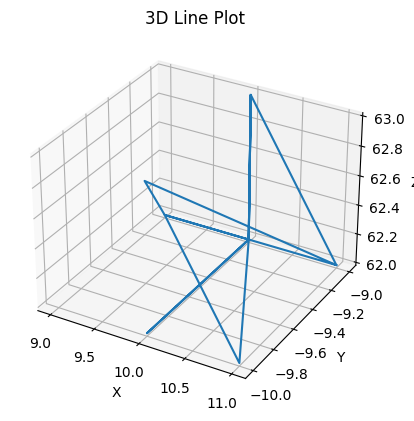

In [18]:
# Now take the X-axis, Y-axis, Z-axis
X = data.iloc[20: 40, 0]
Y = data.iloc[20: 40, 1]
Z = data.iloc[20: 40, 2]

plot_graph(X, Y, Z)

In [13]:
X = np.array(data.iloc[:, 0])
Y = np.array(data.iloc[:, 1])
Z = np.array(data.iloc[:, 2])

In [20]:
def converToTime(i):
    # define base time
    hour = 3
    minutes = 19
    seconds = 16
    
    increment_second = i // 32

    seconds += increment_second     
    minutes += (seconds // 60)
    seconds = seconds % 60

    return f"{hour}:{minutes}:{seconds}"

converToTime(0)

'3:19:16'

In [21]:
def print_bunch_32(X, Y, Z):

    file = open("3_19/ACC_2.txt", "w")
    for i in range(0, len(X)):
        if i % 32 == 0:
            file.writelines(f"----------------------- {converToTime(i)}\n")
        file.writelines(f"{i+1}\t{X[i]}\t{Y[i]}\t{Z[i]}\n")

    file.close()

print_bunch_32(X, Y, Z)

In [15]:
def printOnly1Sec(X, Y, Z, turn):

    # print("5:12")  
    file = open("temp.txt", "w") 
    for i in range(0, len(X)):
        file.writelines(f"{X[i]}\t{Y[i]}\t{Z[i]}\t{turn}\n")

    file.close()
printOnly1Sec(X[26272:26976], Y[26272:26976], Z[26272:26976], 0)

In [13]:
def findDetails(X, Y, Z):

    mean = []
    median = []
    mode = []
    sd = []
    qurtile_25 = []
    qurtile_50 = []    
    qurtile_75 = []    
    inter_quartile = []
    median_high = []
    median_low = []
    for i in range(0, len(X), 32):
        x = X[i : i+32]
        y = Y[i : i+32]
        z = Z[i : i+32]

        # print(x, y, z)
        temp = []

        # calculating the mean
        temp.append(np.mean(x))
        temp.append(np.mean(y))
        temp.append(np.mean(z))

        mean.append(temp)

        # calculating the median
        temp = []
        temp.append(np.median(x))
        temp.append(np.median(y))
        temp.append(np.median(z))

        median.append(temp)

        # calculating the mode
        temp = []
        temp.append(stats.mode(x, keepdims=True)[0][0])
        temp.append(stats.mode(y, keepdims=True)[0][0])
        temp.append(stats.mode(z, keepdims=True)[0][0])
        
        mode.append(temp)

        # calculating the standard deviation
        temp = []
        temp.append(np.std(x))
        temp.append(np.std(y))
        temp.append(np.std(z))

        sd.append(temp)

        # calculating the Quartile
        temp = []
        temp.append(np.quantile(x, .25))
        temp.append(np.quantile(y, .25))
        temp.append(np.quantile(z, .25))
        
        qurtile_25.append(temp)

        temp = []
        temp.append(np.quantile(x, .50))
        temp.append(np.quantile(y, .50))
        temp.append(np.quantile(z, .50))
        
        qurtile_50.append(temp)

        temp = []
        temp.append(np.quantile(x, .75))
        temp.append(np.quantile(y, .75))
        temp.append(np.quantile(z, .75))
        
        qurtile_75.append(temp)



    for i in range(len(mean)):

        print("mean: ", mean[i])
        print("median: ", median[i])
        print("mode: ", mode[i])
        print("Qurtile @25: ", qurtile_25[i])
        print("Qurtile @50: ", qurtile_50[i])
        print("Qurtile @75: ", qurtile_75[i])
        # print("Standard deviation: ", sd[i])


findDetails(X, Y, Z)

mean:  [-57.9375, 18.65625, 20.375]
median:  [-58.0, 18.0, 21.0]
mode:  [-58.0, 17.0, 25.0]
Qurtile @25:  [-60.0, 16.0, 16.0]
Qurtile @50:  [-58.0, 18.0, 21.0]
Qurtile @75:  [-55.75, 21.25, 25.0]
mean:  [-59.65625, 19.53125, 15.15625]
median:  [-59.0, 19.0, 15.0]
mode:  [-59.0, 20.0, 15.0]
Qurtile @25:  [-60.0, 18.75, 14.0]
Qurtile @50:  [-59.0, 19.0, 15.0]
Qurtile @75:  [-59.0, 20.0, 16.25]
mean:  [-52.34375, 10.8125, 14.90625]
median:  [-58.0, 20.0, 16.0]
mode:  [-59.0, 19.0, 15.0]
Qurtile @25:  [-60.0, 14.0, 14.0]
Qurtile @50:  [-58.0, 20.0, 16.0]
Qurtile @75:  [-48.75, 26.0, 21.0]
mean:  [-28.90625, -55.59375, 22.78125]
median:  [-26.0, -53.0, 24.0]
mode:  [-18.0, -49.0, 12.0]
Qurtile @25:  [-41.0, -61.75, 12.75]
Qurtile @50:  [-26.0, -53.0, 24.0]
Qurtile @75:  [-19.5, -47.25, 31.5]
mean:  [-20.125, -44.34375, 29.03125]
median:  [-20.0, -55.0, 25.5]
mode:  [-37.0, -57.0, 20.0]
Qurtile @25:  [-30.25, -59.75, 17.75]
Qurtile @50:  [-20.0, -55.0, 25.5]
Qurtile @75:  [-14.25, -40.0, 33.